# Multi Categorical Classification

In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras_preprocessing
import numpy as np
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

%matplotlib inline

## Getting the computer generated dataset

**Training set:** 191Mb, 2520 images

**Test set:** 28 Mb, 372 images

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-09-18 08:48:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.206.176, 2a00:1450:4017:80b::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.206.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  3.96MB/s    in 50s     

2019-09-18 08:49:37 (3.84 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-09-18 08:49:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.206.176, 2a00:1450:4017:80b::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.206.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/

## Unzipping and path settings

In [2]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-115.png', 'rock07-k03-095.png', 'rock02-006.png', 'rock01-058.png', 'rock06ck02-034.png', 'rock01-054.png', 'rock02-116.png', 'rock04-085.png', 'rock05ck01-048.png', 'rock06ck02-089.png']
['paper06-044.png', 'paper02-057.png', 'paper07-039.png', 'paper03-083.png', 'paper03-110.png', 'paper07-008.png', 'paper05-095.png', 'paper04-100.png', 'paper03-075.png', 'paper06-041.png']
['scissors03-005.png', 'scissors02-060.png', 'scissors01-054.png', 'scissors01-094.png', 'scissors01-023.png', 'testscissors01-016.png', 'testscissors03-050.png', 'testscissors02-002.png', 'scissors02-031.png', 'scissors01-096.png']


## Look-up the dataset

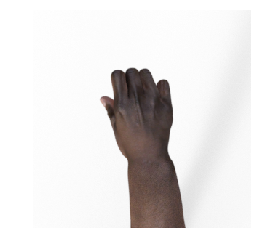

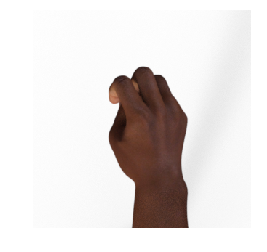

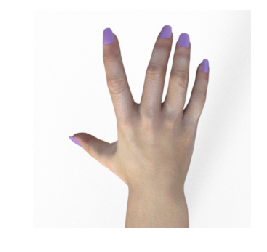

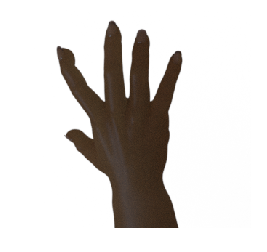

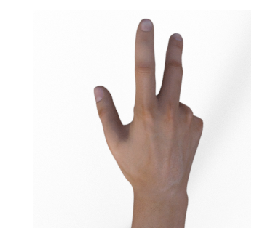

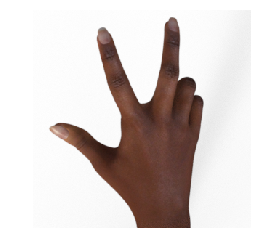

In [4]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

## Data preprocessing

In [5]:
TRAINING_DIR = os.path.join("/tmp/rps/")
VALIDATION_DIR = os.path.join("/tmp/rps-test-set/")

# Image augmentation
training_datagen = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')
# Normalization
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Creating data generator from directory
train_generator = training_datagen.flow_from_directory(
                        TRAINING_DIR,
                        target_size=(150,150),
                        class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
                        VALIDATION_DIR,
                        target_size=(150,150),
                        class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Creating the CNN model

In [6]:
model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # [paper, rock, scissor]
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
# Model configuration
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Training the CNN model

In [9]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [10]:
with tf.device('/device:GPU:0'):
    history = model.fit_generator(
                    generator = train_generator, 
                    epochs = 25, 
                    validation_data = validation_generator, 
                    verbose = 2)

Epoch 1/25
79/79 - 20s - loss: 1.1639 - acc: 0.3512 - val_loss: 1.0882 - val_acc: 0.4435
Epoch 2/25
79/79 - 19s - loss: 0.9378 - acc: 0.5520 - val_loss: 0.5256 - val_acc: 0.6774
Epoch 3/25
79/79 - 23s - loss: 0.6260 - acc: 0.7274 - val_loss: 0.2319 - val_acc: 0.9973
Epoch 4/25
79/79 - 25s - loss: 0.4412 - acc: 0.8187 - val_loss: 0.1899 - val_acc: 0.8978
Epoch 5/25
79/79 - 25s - loss: 0.3062 - acc: 0.8881 - val_loss: 0.0702 - val_acc: 1.0000
Epoch 6/25
79/79 - 23s - loss: 0.2347 - acc: 0.9194 - val_loss: 0.0571 - val_acc: 0.9946
Epoch 7/25
79/79 - 21s - loss: 0.2438 - acc: 0.9091 - val_loss: 0.0545 - val_acc: 0.9731
Epoch 8/25
79/79 - 21s - loss: 0.1975 - acc: 0.9298 - val_loss: 0.0390 - val_acc: 1.0000
Epoch 9/25
79/79 - 24s - loss: 0.1582 - acc: 0.9472 - val_loss: 0.0173 - val_acc: 1.0000
Epoch 10/25
79/79 - 22s - loss: 0.1770 - acc: 0.9369 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 11/25
79/79 - 21s - loss: 0.1105 - acc: 0.9599 - val_loss: 0.0846 - val_acc: 0.9570
Epoch 12/25
79/79 -

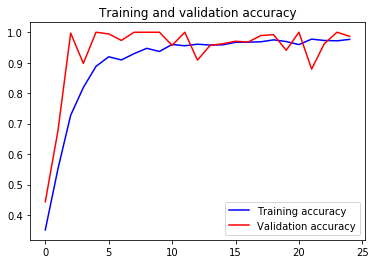

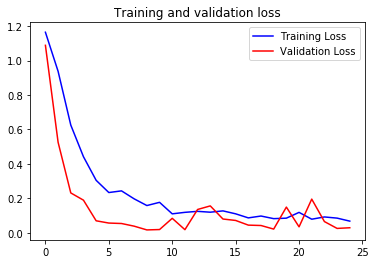

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()